**Classification of Water Potability**

The classification model will use the water_potability.csv dataset. This classification analysis will serve to determine if water is potabile or not based on the features available. The dataset itself contains 3276 rows and 10 columns, with a total of 1434 missing values that were filled. To address the missing values, entire rows will be deleted when missing values have been detected.


In [52]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

**Exploratory Data Analysis**

In [53]:
df = pd.read_csv ('water_potability.csv')

df = df.dropna()

x = df.drop(columns = ['Potability']).copy()
y = df ['Potability']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

In [54]:
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [55]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [56]:
#checking for missing values 
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
print('Shape:', df.shape)
print('------------')
print(df.dtypes)
print('------------')
print(df.head)


Shape: (2011, 10)
------------
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object
------------
<bound method NDFrame.head of              ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

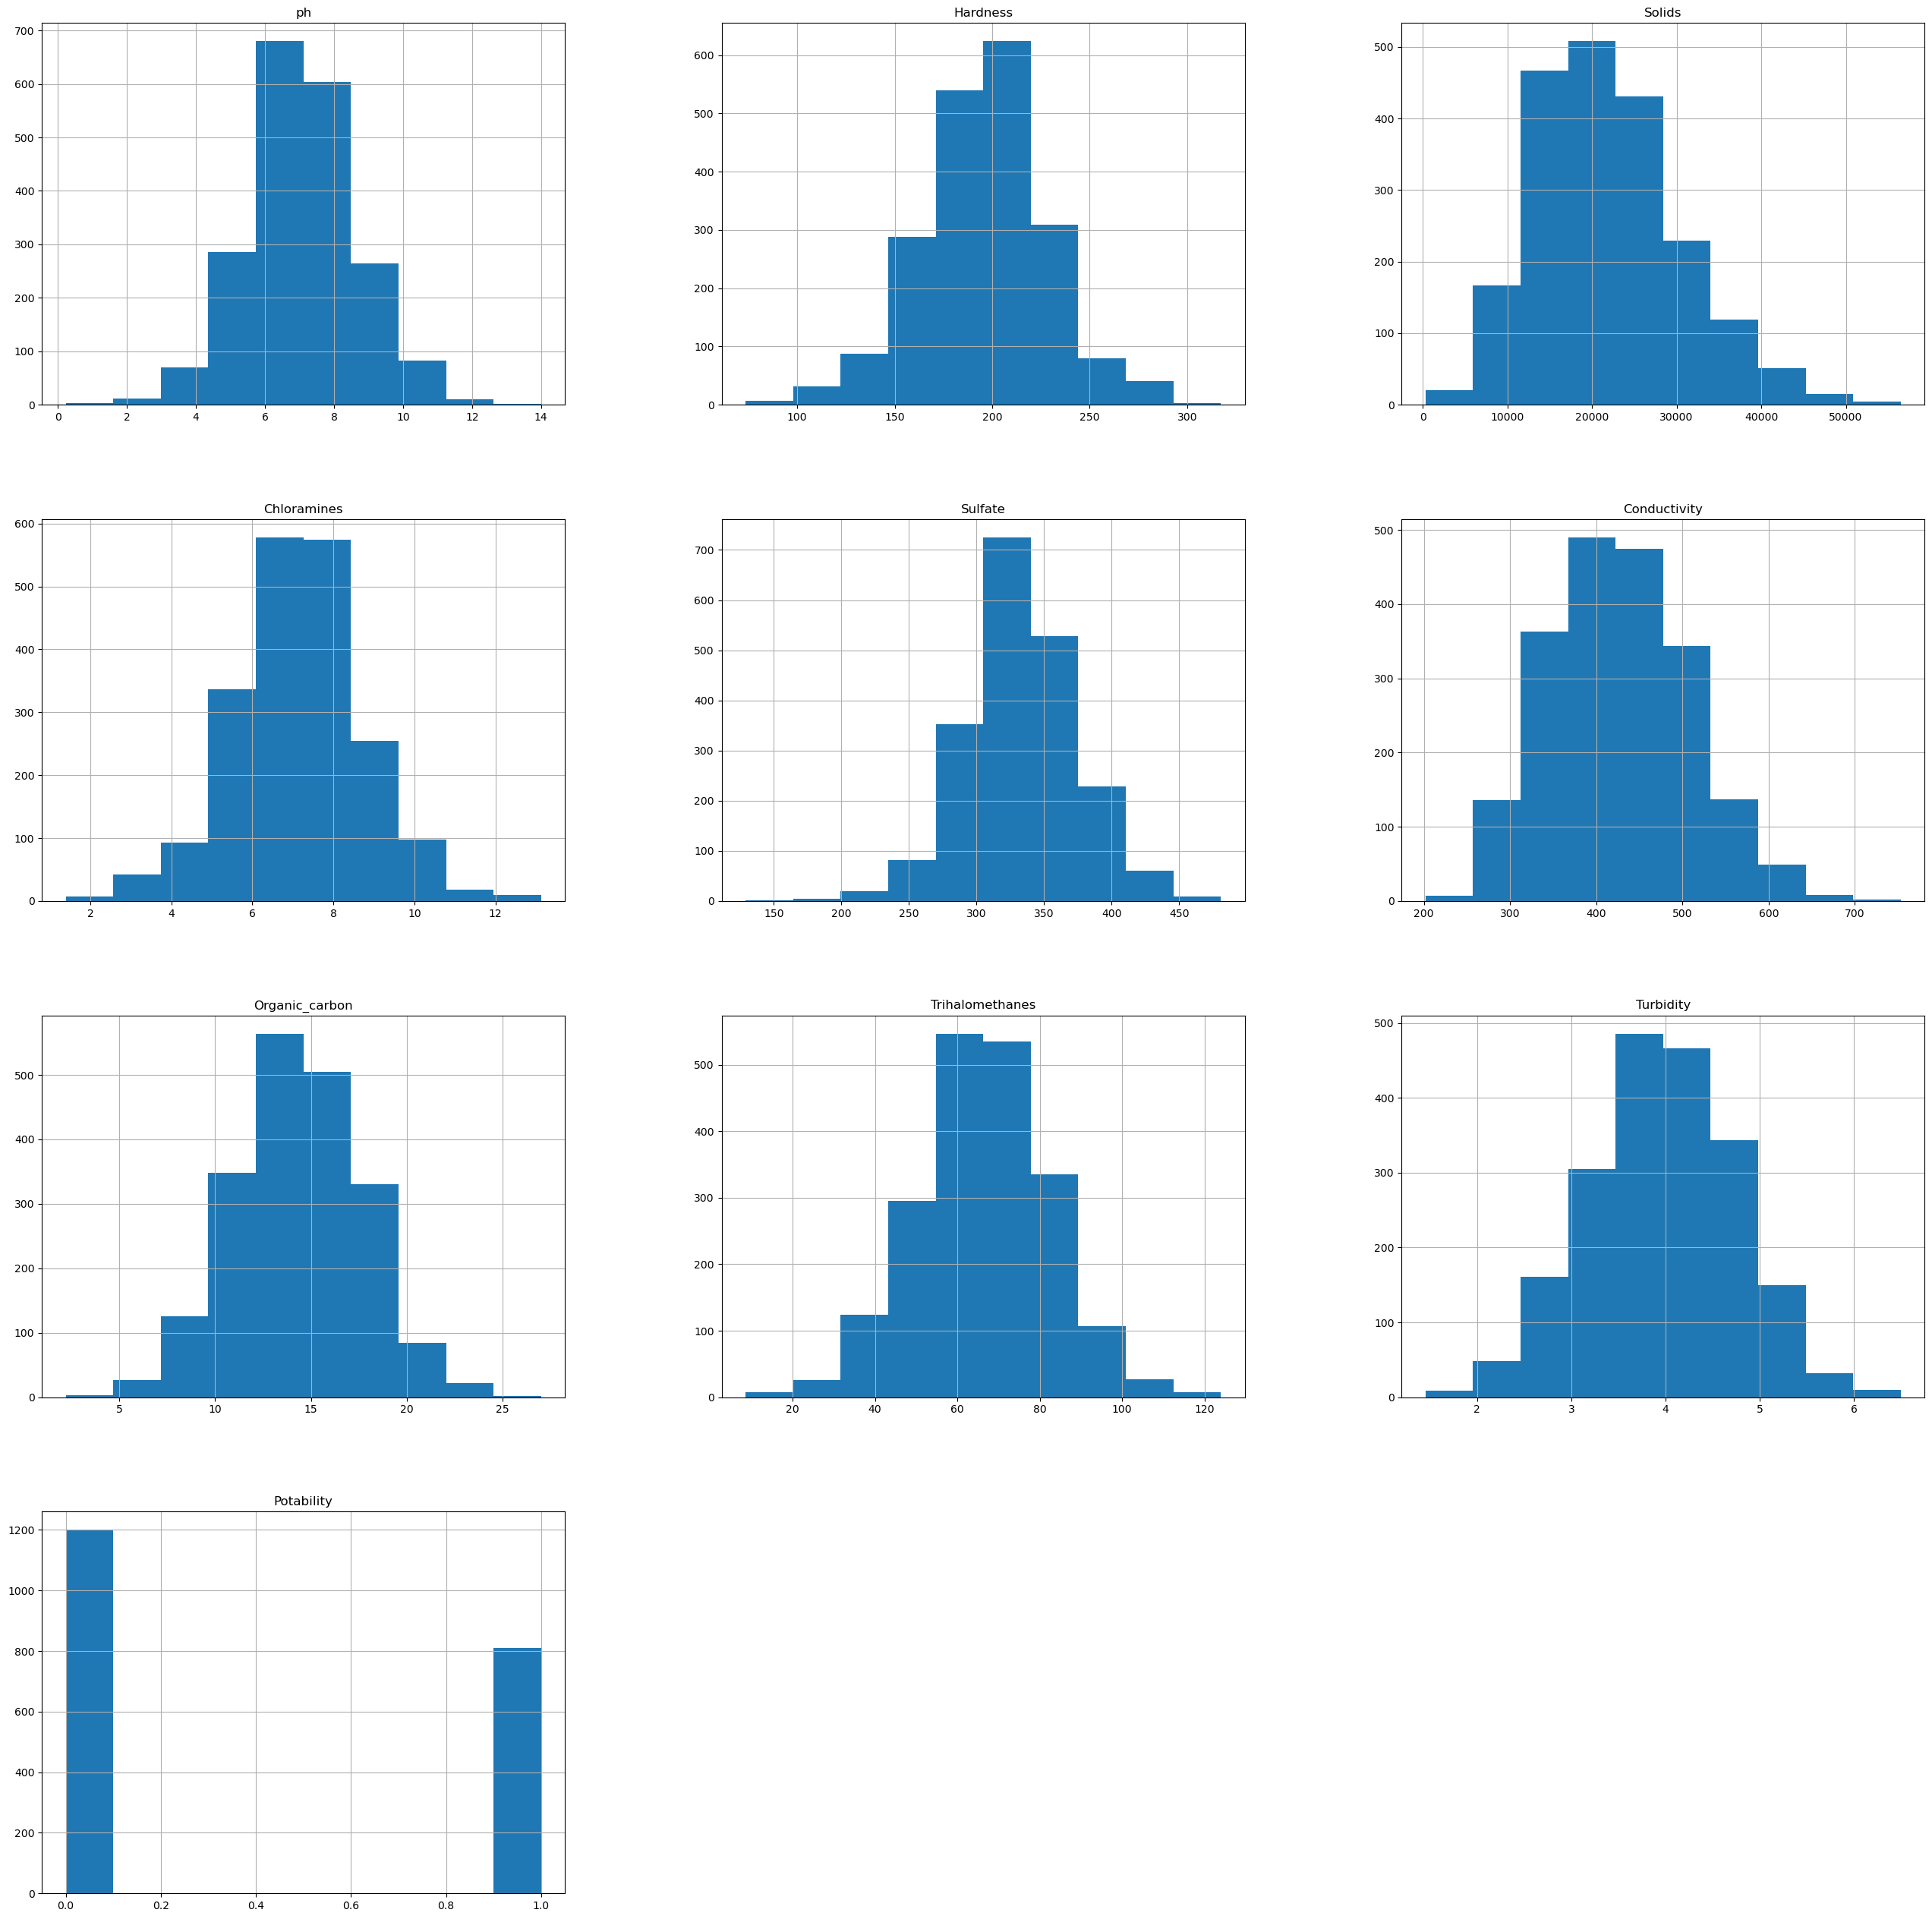

In [58]:
df.hist(figsize =(32,32))

(array([1200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         811.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

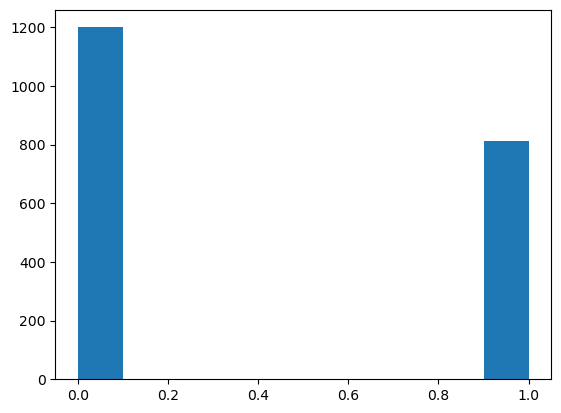

In [59]:
plt.hist(y) #Potability histogram 

In [60]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [61]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


**Cleaning Dataset**

In [62]:
df_copy = df.copy()

In [63]:
df_copy['ph'].fillna(df_copy['ph'].median(),inplace = True)
df_copy['Sulfate'].fillna(df_copy['Sulfate'].median(),inplace = True)
df_copy['Trihalomethanes'].fillna(df_copy['Trihalomethanes'].median(),inplace = True)

In [64]:
df_copy.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Observing Correlation**

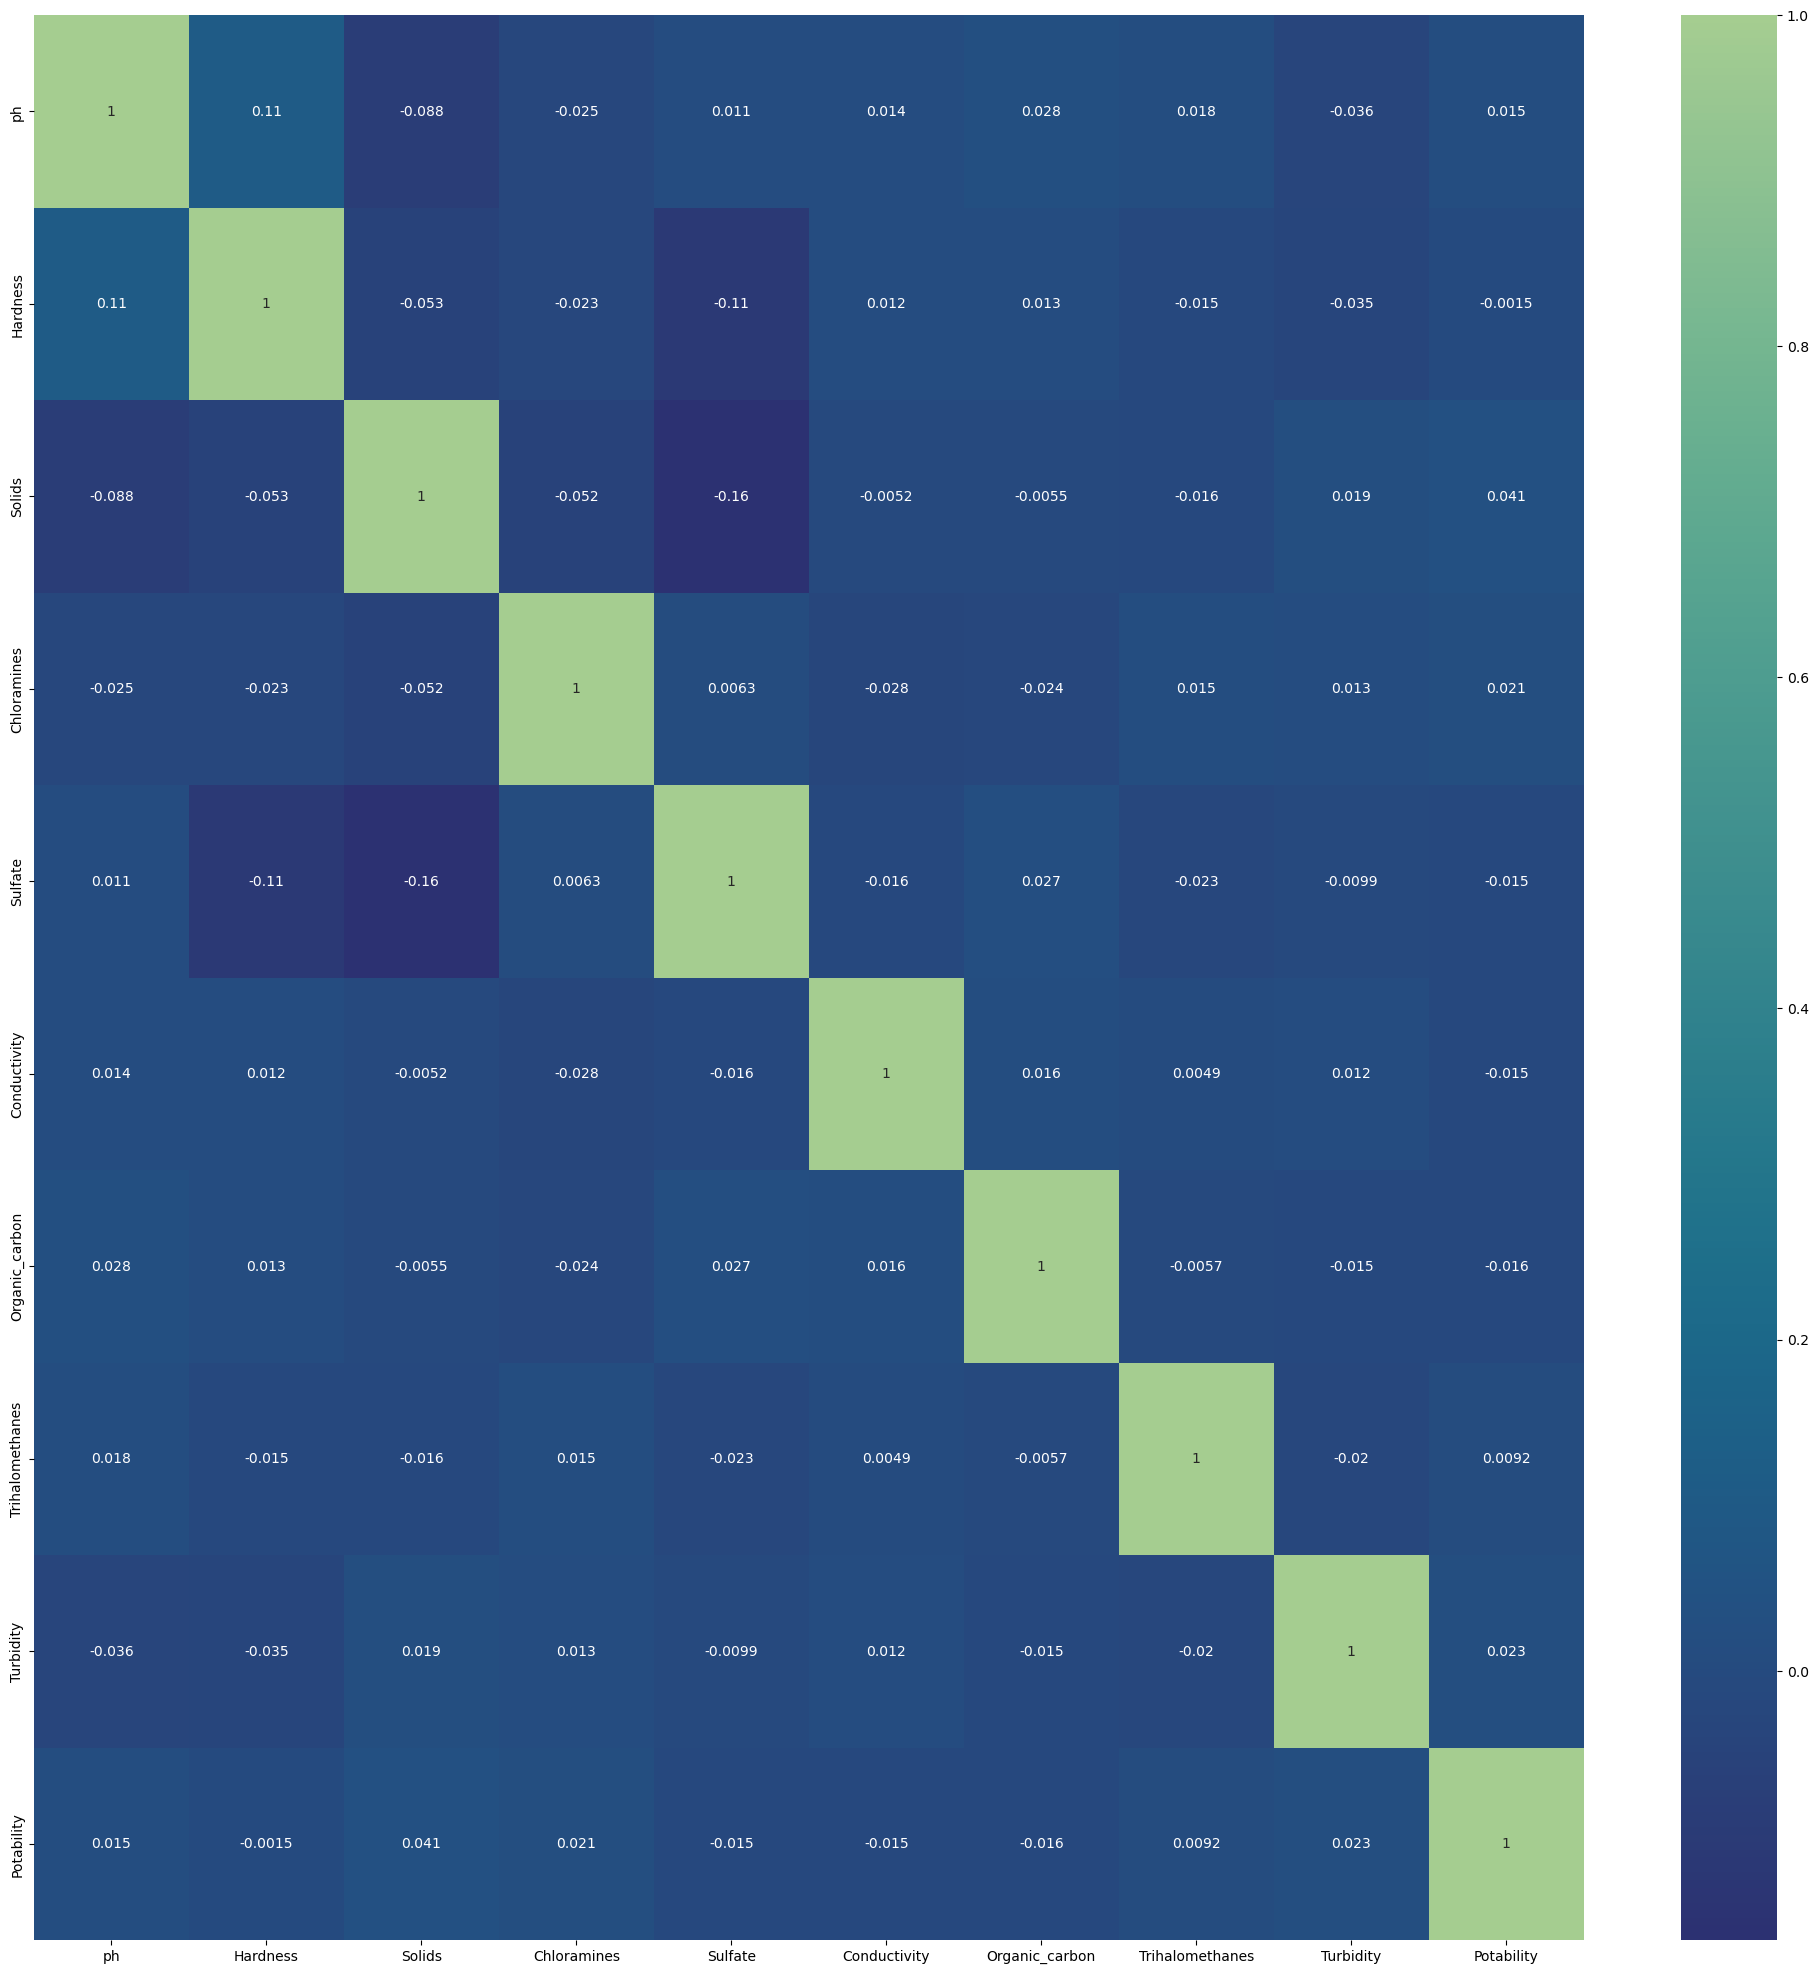

In [65]:
corr = df_copy.corr()
corr_feat = corr.index
plt.figure(figsize = (25,25))
heatmap_df = sns.heatmap(df_copy[corr_feat].corr(),annot = True,cmap = 'crest_r')

**Logistic Regression Analysis**

In [66]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()
lr.fit(x_test, y_test)
lr.score(x_test, y_test)

lr_ypred_test = lr.predict(x_test)
lr_ytrain_pred = lr.predict(x_train)

In [68]:
lr_accuracy_train = accuracy_score(y_train,lr_ytrain_pred)
lr_accuracy_test = accuracy_score(y_test,lr_ypred_test)

print('Train dataset accuracy:', lr_accuracy_train)
print('Test dataset accuracy:',lr_accuracy_test)

Train dataset accuracy: 0.5876865671641791
Test dataset accuracy: 0.6277915632754343


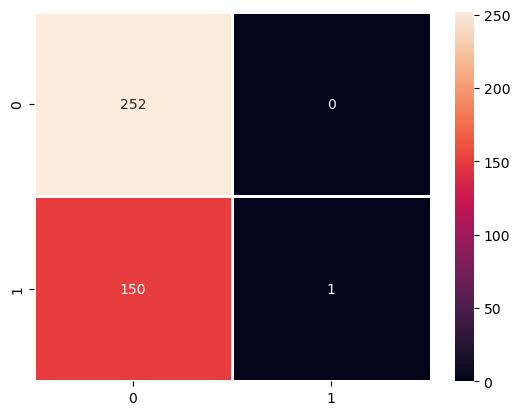

In [89]:
conmatrix = confusion_matrix(y_test,lr_ypred_test)
conmatrix = pd.DataFrame(data = conmatrix,columns =['0','1'],index =['0','1'])
heatmap_df = sns.heatmap(conmatrix,annot= True,linewidth =1,fmt ='d')
plt.show()


**Gradient Boosting Classifier**

In [70]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb = GradientBoostingClassifier()
gb.fit(x_test, y_test)
gb.score(x_test, y_test)

gb_ypred_test = gb.predict(x_test)
gb_ytrain_pred = gb.predict(x_train)

In [72]:
gb_accuracy_train = accuracy_score(y_train,gb_ytrain_pred)
gb_accuracy_test = accuracy_score(y_test,gb_ypred_test)

print('Train dataset accuracy:', gb_accuracy_train)
print('Test dataset accuracy:',gb_accuracy_test)

Train dataset accuracy: 0.6281094527363185
Test dataset accuracy: 0.9478908188585607


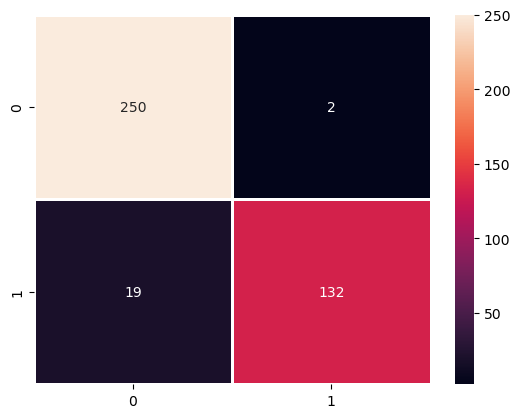

In [90]:
gb_conmatrix = confusion_matrix(y_test,gb_ypred_test)
heatmap_dfgb = sns.heatmap(gb_conmatrix,annot= True,linewidth =1,fmt ='d')
plt.show()

**Neural Networks - Multi-Layer Perceptron**

In [74]:
#import multi-layer perceptron, neural networks 
from sklearn.neural_network import MLPClassifier 

Train dataset accuracy: 0.5895522388059702
Test dataset accuracy: 0.6253101736972705


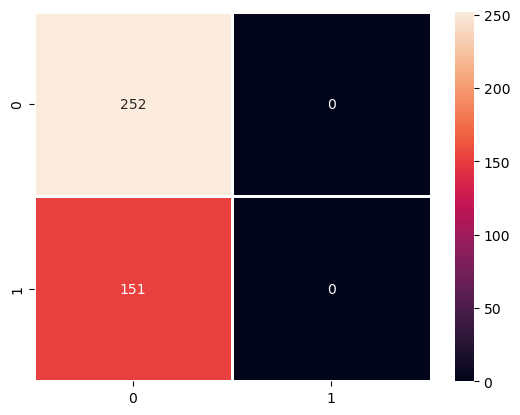

In [91]:
mlp = MLPClassifier(hidden_layer_sizes=(3,5,3), activation = 'tanh', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

ypred_train = mlp.predict(x_train)
ypred_test = mlp.predict(x_test)

MLP_accuracy_train = accuracy_score(y_train, ypred_train)
MLP_accuracy_test = accuracy_score(y_test, ypred_test)

print('Train dataset accuracy:', MLP_accuracy_train)
print('Test dataset accuracy:', MLP_accuracy_test)

mlp_conmatrix = confusion_matrix(y_test, ypred_test)
heatmap_dfmlp = sns.heatmap(mlp_conmatrix,annot= True,linewidth =1,fmt ='d')
plt.show()